In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.style.use('ggplot') 
%matplotlib inline

# Preprocessing

Read the data using pandas (1 point)

In [2]:
data = pd.read_csv('risk_factors_cervical_cancer.csv')
pd.options.display.max_columns = 36
print('Shape of dataset:', data.shape)

Shape of dataset: (858, 36)


In [3]:
'''
i think it is important to understand the number of missimg values. 
firstly because we cant work with str data type and we should replace it
secondly to understand which columns we can delete because of lot '?' there
'''

def missing_values(data):
    
    '''
    i choose to drop STDs: Time since first diagnosis and STDs: Time since last diagnosis 
    because of big empty values
    '''
    
    data = data.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1)
    
    columns = data.columns
    for i in range(len(columns)):
        data.loc[data[columns[i]] == '?', columns[i]] = np.nan
        data.loc[data[columns[i]] == '??', columns[i]] = np.nan
    
    #drop all Nan rows
    data = data.dropna() 
    
    return data.apply(pd.to_numeric)

data = missing_values(data)

/anaconda3/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [4]:
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,42.0,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
print('Shape of dataset:', data.shape)

Shape of dataset: (668, 34)


In [6]:
'''
because there is no unique values besides 0, i choosed to delete this columns
'''
print(data['STDs:AIDS'].unique())
print(data['STDs:cervical condylomatosis'].unique())

data = data.drop(['STDs:AIDS', 'STDs:cervical condylomatosis'], axis=1)

[0.]
[0.]


In both datasets, we have several columns that can be used to design target; see details in the documentation. Please, select a reasonable binary target combining these columns and motivate your selection. You can also select a couple of targets to analyze & compare the performance of ML models within the next steps. Important: don't forget to drop columns directly associated with the selected target (3 points).

In [7]:
correlation_Hinselmann = abs((data.corrwith(data['Hinselmann']))).drop(['Hinselmann', 
                                                                   'Schiller', 
                                                                   'Citology', 
                                                                   'Biopsy'])

df_corr = pd.DataFrame(correlation_Hinselmann, columns =['Hinselmann'])
correlation_Schiller = abs(data.corrwith(data['Schiller'])).drop(['Hinselmann', 
                                                                   'Schiller', 
                                                                   'Citology', 
                                                                   'Biopsy'])
df_corr['Schiller'] = correlation_Schiller
correlation_Citology = abs(data.corrwith(data['Citology'])).drop(['Hinselmann', 
                                                                   'Schiller', 
                                                                   'Citology', 
                                                                   'Biopsy'])
df_corr['Citology'] = correlation_Citology
df_Citology = pd.DataFrame(correlation_Citology, columns =['Citology'])
correlation_Biopsy = abs(data.corrwith(data['Biopsy'])).drop(['Hinselmann', 
                                                                   'Schiller', 
                                                                   'Citology', 
                                                                   'Biopsy'])
df_corr['Biopsy'] = correlation_Biopsy


In [8]:
cm = sns.light_palette("green", as_cmap=True)

df_corr.style.background_gradient(cmap=cm)

,Hinselmann,Schiller,Citology,Biopsy
Age,0.0306247,0.0847575,0.034654,0.0562091
Number of sexual partners,0.0604979,0.0219033,0.0138902,0.00210554
First sexual intercourse,0.00321212,7.26454e-05,0.00570478,0.0285015
Num of pregnancies,0.0360337,0.096651,0.0419077,0.0466997
Smokes,0.014189,0.0284159,0.0292081,0.0260985
Smokes (years),0.0283477,0.0628633,0.0261842,0.0365836
Smokes (packs/year),0.0206471,0.0194999,0.0328162,0.00777631
Hormonal Contraceptives,0.0405801,0.0047714,0.0147291,0.0128818
Hormonal Contraceptives (years),0.0196531,0.081957,0.0187489,0.0837514
IUD,0.0602546,0.0961567,0.0125641,0.0746796


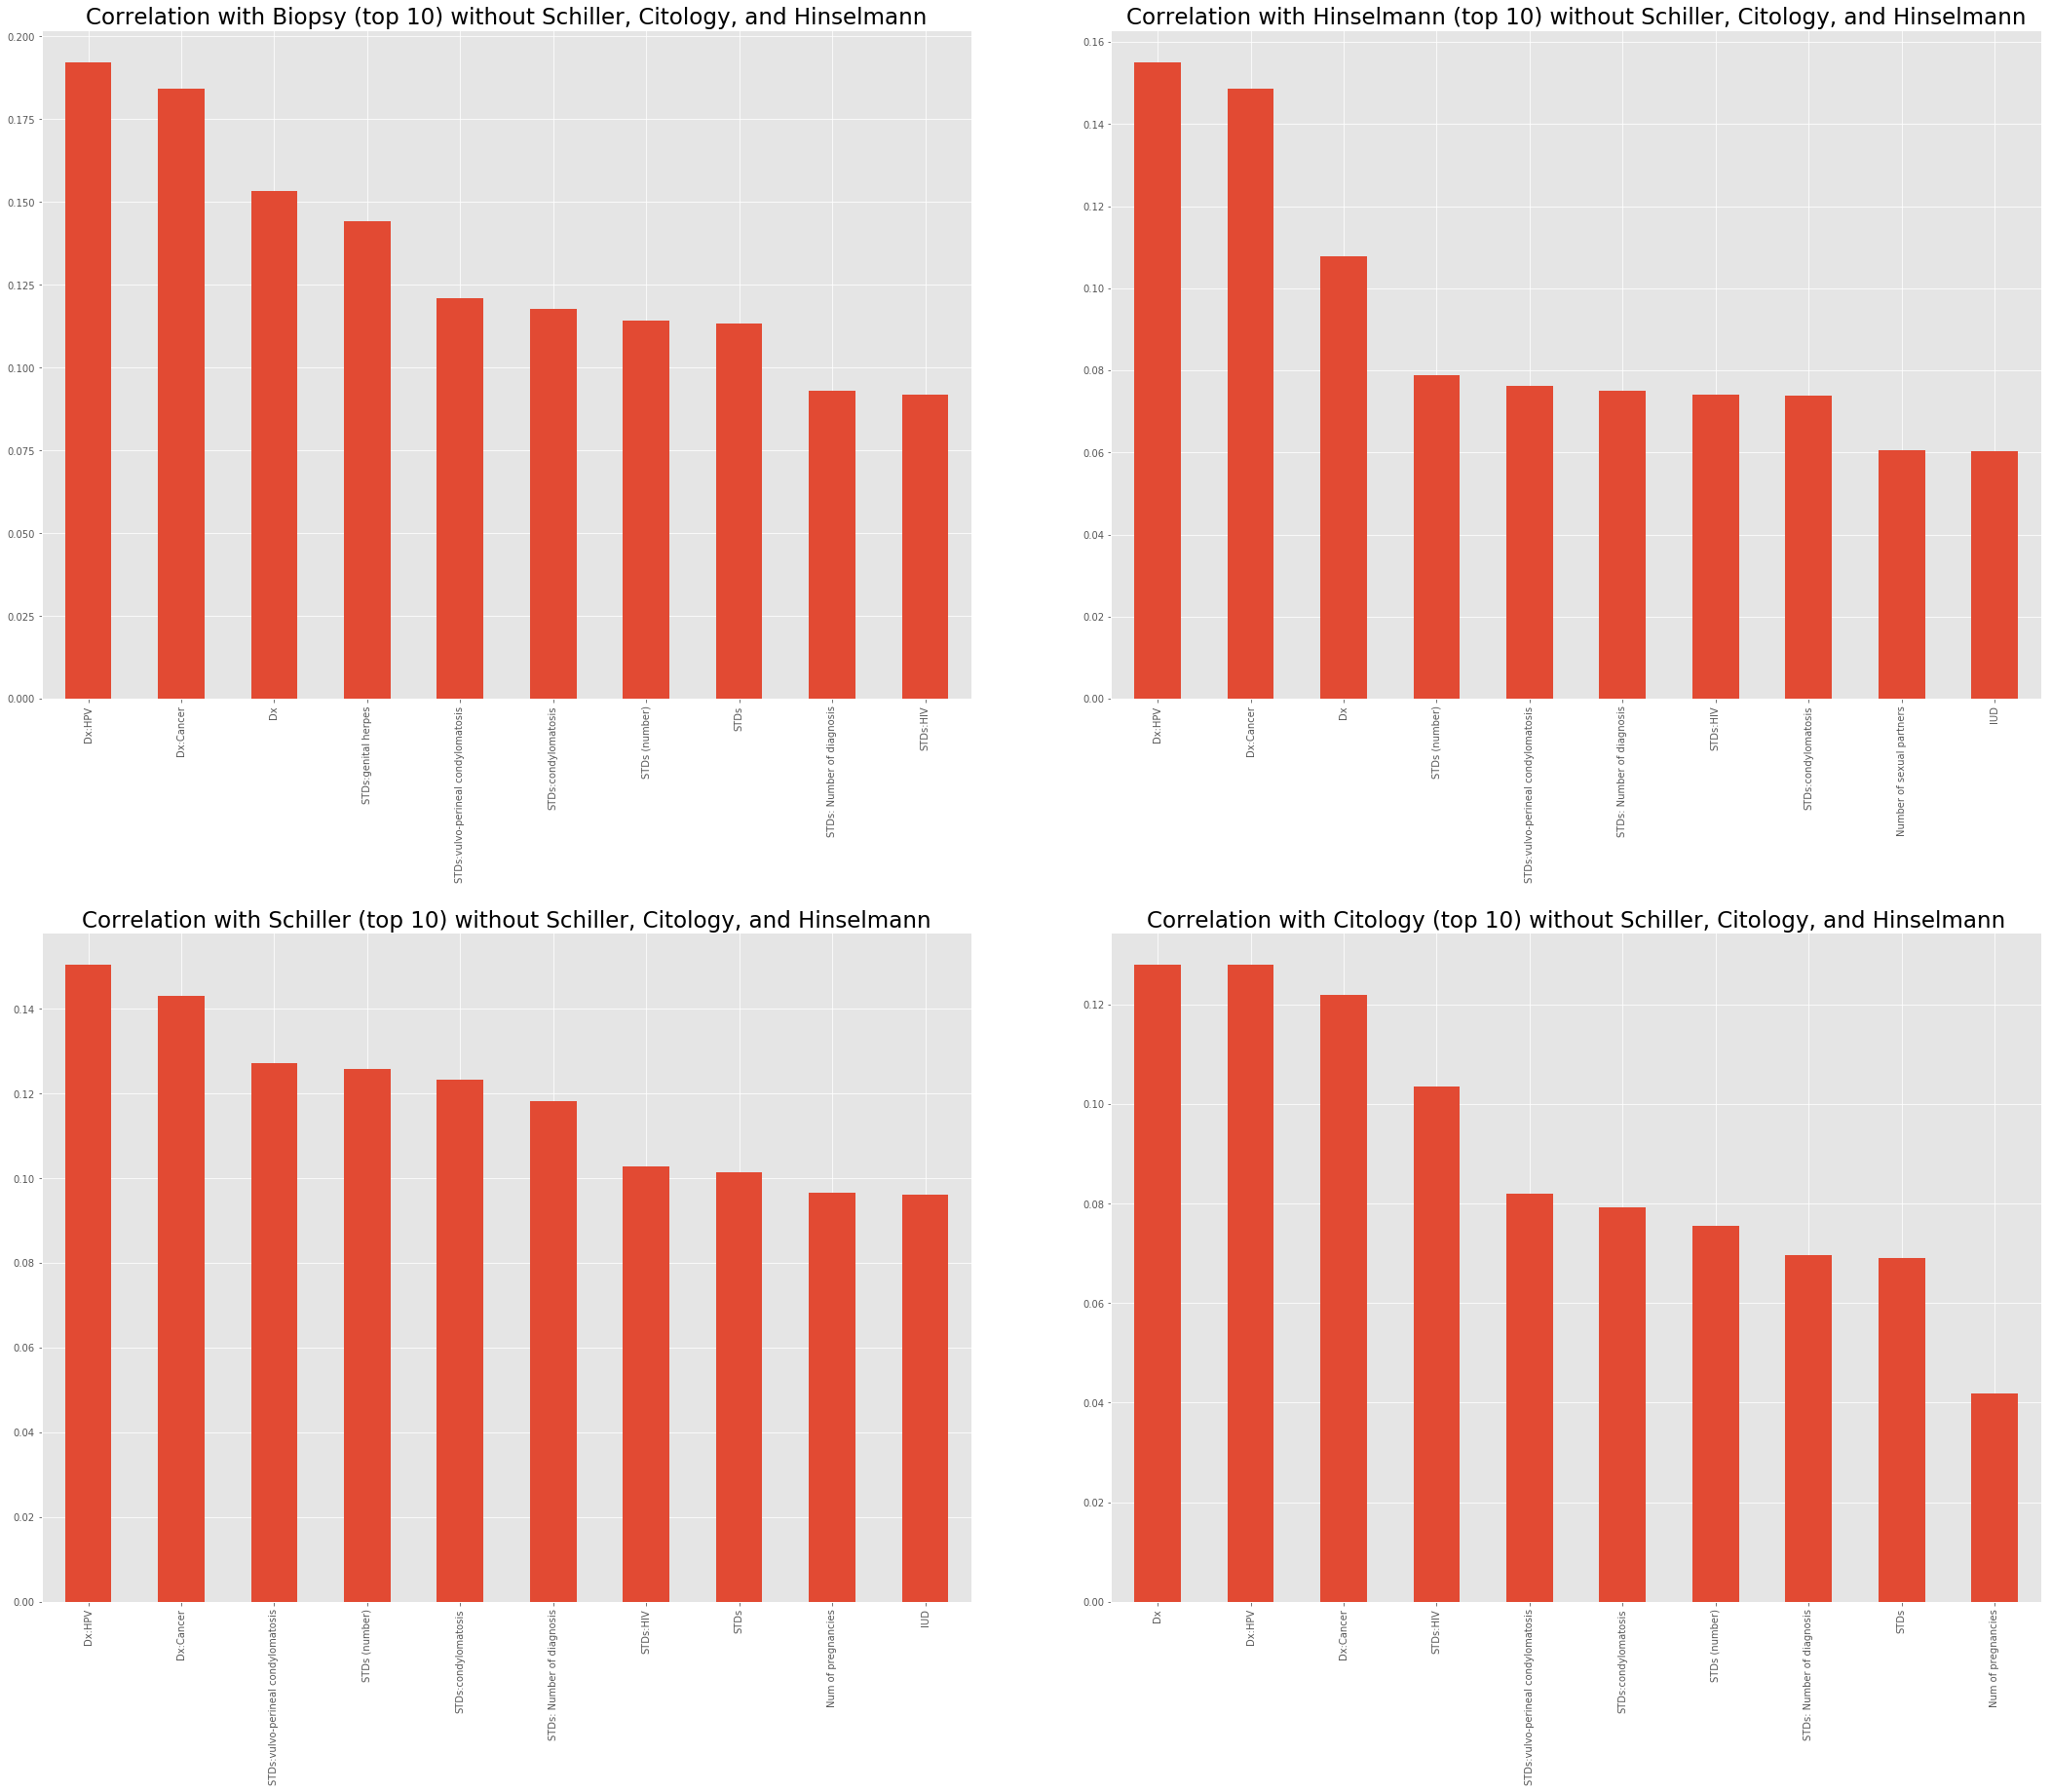

In [9]:
'''
I didn't find any information about Hinselmann

Schiller shows just unhealthy tissue, but it's not necessarily a direct sign of cancer

Cytology takes one cell, so it is wiser to consider a biopsy at once

biopsy reveals tumor cells directly


and biopsy is the gold standard i choose this parameter for define of cancer in organism
'''

#data = data.drop(['Schiller', 'Citology', 'Hinselmann'], axis=1)

fontdict = {'fontsize': 23,
           'fontweight' : 40}

plt.subplot(221)
(data.corrwith(data['Biopsy'])).drop(['Hinselmann',
                                      'Schiller', 
                                      'Citology', 
                                       'Biopsy']).abs().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5))
plt.title('Correlation with Biopsy (top 10) without Schiller, Citology, and Hinselmann',fontdict = fontdict)

plt.subplot(222)
(data.corrwith(data['Hinselmann'])).drop(['Hinselmann',
                                      'Schiller', 
                                      'Citology', 
                                       'Biopsy']).abs().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5))
plt.title('Correlation with Hinselmann (top 10) without Schiller, Citology, and Hinselmann',fontdict = fontdict)


plt.subplot(223)
(data.corrwith(data['Schiller'])).drop(['Hinselmann',
                                      'Schiller', 
                                      'Citology', 
                                       'Biopsy']).abs().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5))
plt.title('Correlation with Schiller (top 10) without Schiller, Citology, and Hinselmann',fontdict = fontdict)


plt.subplot(224)
(data.corrwith(data['Citology'])).drop(['Hinselmann',
                                      'Schiller', 
                                      'Citology', 
                                       'Biopsy']).abs().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5))
plt.title('Correlation with Citology (top 10) without Schiller, Citology, and Hinselmann',fontdict = fontdict)



# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=4.5, bottom=0.02, left=0.10, right=2.95, hspace=0.35,
                    wspace=0.15)

# Exploratory analysis

Generate three hypotheses related to your problem and try to confirm or deny them using exploratory visualization. Please, try to use different types of plots if possible. (6 points, 2 points for each hypothesis. If you use only one type of plots for all hypotheses -- no more than 4 points for this part)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/anaconda3/lib/p

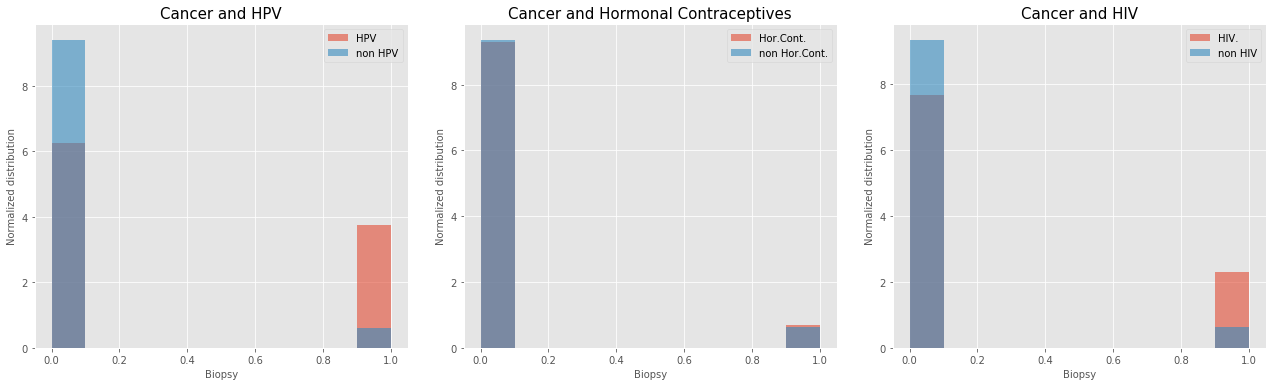

In [10]:
'''
first hypothese (actually this is not hypothese, as i know) 
that cervical cancer depends on HPV(Human papillomavirus)
'''

plt.subplot(231)
plt.hist(data[data['Dx:HPV'] == 1]['Biopsy'], alpha=0.6, label='HPV', normed=True)
plt.hist(data[data['Dx:HPV'] == 0]['Biopsy'], alpha=0.6, label='non HPV', normed=True)
plt.legend()
plt.xlabel('Biopsy', fontsize=10)
plt.ylabel('Normalized distribution', fontsize=10)
plt.title('Cancer and HPV', fontsize=15)

'''
there is myth that Hormonal Contraceptives can lead to cancer
'''

plt.subplot(232)
plt.hist(data[data['Hormonal Contraceptives'] == 1]['Biopsy'], alpha=0.6, label='Hor.Cont.', normed=True)
plt.hist(data[data['Hormonal Contraceptives'] == 0]['Biopsy'], alpha=0.6, label='non Hor.Cont.', normed=True)
plt.legend()
plt.xlabel('Biopsy', fontsize=10)
plt.ylabel('Normalized distribution', fontsize=10)
plt.title('Cancer and Hormonal Contraceptives', fontsize=15)

'''
HIV :) you know that it is classic
'''

plt.subplot(233)
plt.hist(data[data['STDs:HIV'] == 1]['Biopsy'], alpha=0.6, label='HIV.', normed=True)
plt.hist(data[data['STDs:HIV'] == 0]['Biopsy'], alpha=0.6, label='non HIV', normed=True)
plt.legend()
plt.xlabel('Biopsy', fontsize=10)
plt.ylabel('Normalized distribution', fontsize=10)
plt.title('Cancer and HIV', fontsize=15)


plt.subplots_adjust(top=2.92, bottom=0.28, left=0.10, right=2.95, hspace=0.35,
                    wspace=0.15)

Text(0.5, 1.0, 'Cancer and HIV')

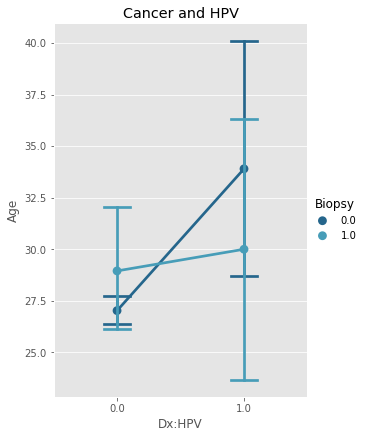

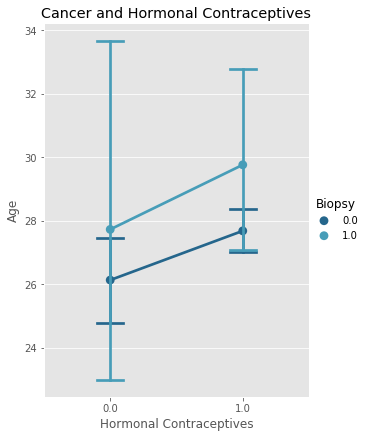

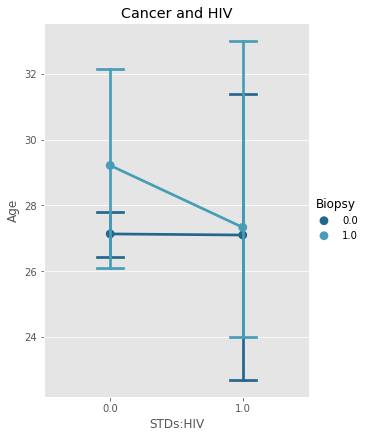

In [15]:
sns.catplot(x="Dx:HPV", y="Age", hue="Biopsy", 
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=data)
plt.title('Cancer and HPV')


sns.catplot(x="Hormonal Contraceptives", y="Age", hue="Biopsy", 
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=data)
plt.title('Cancer and Hormonal Contraceptives')


sns.catplot(x="STDs:HIV", y="Age", hue="Biopsy", 
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=data)
plt.title('Cancer and HIV')

- As you can see, indeed, people with cervical cancer are more likely to have the human papillomavirus in the their body

- Hormonal Contraceptives, if a person takes it now, don't affect the possibility of cancer, but I suppose that maybe the duration of the adoption of contraceptives can affect the possibility of cancer

- It is hard to say something about HIV and how it's can affect the possibility of cancer, because, i suppose, that if a person undergoing therapy then all will be ok. but on the last stage of HIV formation of malignant tumors are a common case

Another one type of plots to show the previous hypotheses:

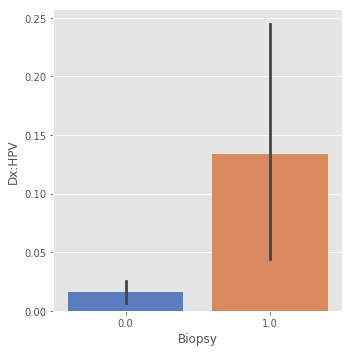

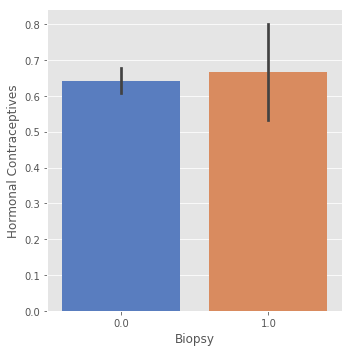

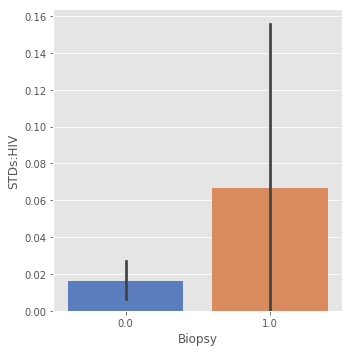

In [16]:
sns.catplot(x="Biopsy", y="Dx:HPV", data=data,kind="bar", palette="muted")

sns.catplot(x="Biopsy", y="Hormonal Contraceptives", data=data,kind="bar", palette="muted")

sns.catplot(x="Biopsy", y="STDs:HIV", data=data, kind="bar", palette="muted")


# plt.show()
# plt.subplots_adjust(top=2.92, bottom=0.28, left=0.10, right=2.95, hspace=0.35,
#                     wspace=0.15)

No handles with labels found to put in legend.
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternati

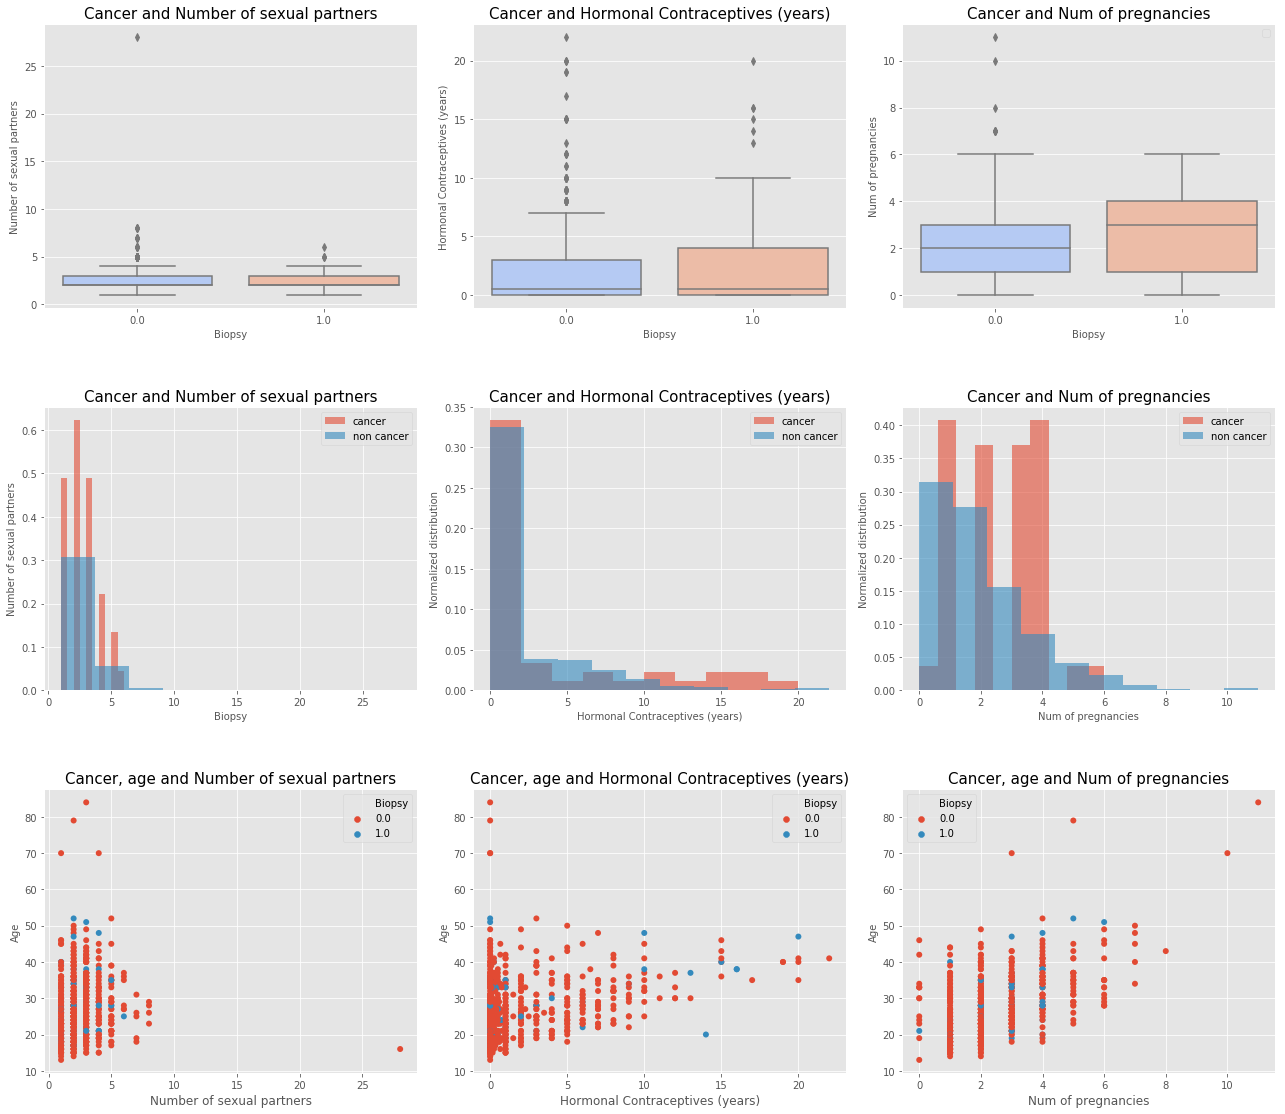

In [17]:
'''
let's see how Number of sexual partners affects on cancer
'''

plt.subplot(331)
sns.boxplot(x="Biopsy", y="Number of sexual partners", data=data, palette="coolwarm")
plt.xlabel('Biopsy', fontsize=10)
plt.ylabel('Number of sexual partners', fontsize=10)
plt.title('Cancer and Number of sexual partners', fontsize=15)

'''
does Hormonal Contraceptives (years) affect on cancer?
'''
plt.subplot(332)
sns.boxplot(x="Biopsy", y="Hormonal Contraceptives (years)", data=data, palette="coolwarm")
plt.xlabel('Biopsy', fontsize=10)
plt.ylabel('Hormonal Contraceptives (years)', fontsize=10)
plt.title('Cancer and Hormonal Contraceptives (years)', fontsize=15)


'''
and what about Num of pregnancies
'''
plt.subplot(333)
sns.boxplot(x="Biopsy", y="Num of pregnancies", data=data, palette="coolwarm")
plt.legend()
plt.xlabel('Biopsy', fontsize=10)
plt.ylabel('Num of pregnancies', fontsize=10)
plt.title('Cancer and Num of pregnancies', fontsize=15)

plt.subplot(334)
plt.hist(data[data['Biopsy'] == 1]['Number of sexual partners'], alpha=0.6, label='cancer', normed=True)
plt.hist(data[data['Biopsy'] == 0]['Number of sexual partners'], alpha=0.6, label='non cancer', normed=True)
plt.legend()
plt.xlabel('Biopsy', fontsize=10)
plt.ylabel('Number of sexual partners', fontsize=10)
plt.title('Cancer and Number of sexual partners', fontsize=15)

plt.subplot(335)
plt.hist(data[data['Biopsy'] == 1]['Hormonal Contraceptives (years)'], alpha=0.6, label='cancer', normed=True)
plt.hist(data[data['Biopsy'] == 0]['Hormonal Contraceptives (years)'], alpha=0.6, label='non cancer', normed=True)
plt.legend()
plt.xlabel('Hormonal Contraceptives (years)', fontsize=10)
plt.ylabel('Normalized distribution', fontsize=10)
plt.title('Cancer and Hormonal Contraceptives (years)', fontsize=15)

plt.subplot(336)
plt.hist(data[data['Biopsy'] == 1]['Num of pregnancies'], alpha=0.6, label='cancer', normed=True)
plt.hist(data[data['Biopsy'] == 0]['Num of pregnancies'], alpha=0.6, label='non cancer', normed=True)
plt.legend()
plt.xlabel('Num of pregnancies', fontsize=10)
plt.ylabel('Normalized distribution', fontsize=10)
plt.title('Cancer and Num of pregnancies', fontsize=15)


plt.subplot(337)
sns.scatterplot(x="Number of sexual partners", y="Age",
                hue="Biopsy",
                sizes=(1, 8), linewidth=0,
                data=data)
plt.ylabel('Age', fontsize=10)
plt.title('Cancer, age and Number of sexual partners', fontsize=15)


plt.subplot(338)
sns.scatterplot(x="Hormonal Contraceptives (years)", y="Age",
                hue="Biopsy",
                sizes=(1, 8), linewidth=0,
                data=data)
plt.ylabel('Age', fontsize=10)
plt.title('Cancer, age and Hormonal Contraceptives (years)', fontsize=15)

plt.subplot(339)
sns.scatterplot(x="Num of pregnancies", y="Age",
                hue="Biopsy",
                sizes=(1, 8), linewidth=0,
                data=data)
plt.ylabel('Age', fontsize=10)
plt.title('Cancer, age and Num of pregnancies', fontsize=15)

plt.subplots_adjust(top=3.92, bottom=0.28, left=0.10, right=2.95, hspace=0.35,
                    wspace=0.15)

- quantity of sex partners don't affect the possibility of cancer, but actually, I read that this is a weighty parameter in the risk of cervical cancer

- cases of cancer with long use hormonal contraceptives are existed, but I wouldn't say that these cases talk about something. 

- there was hypothesised that if women don't have a pregnancy, in the old age she has more probability to take cancer. but I don't​ see confirmation of this hypothesis on the graphs

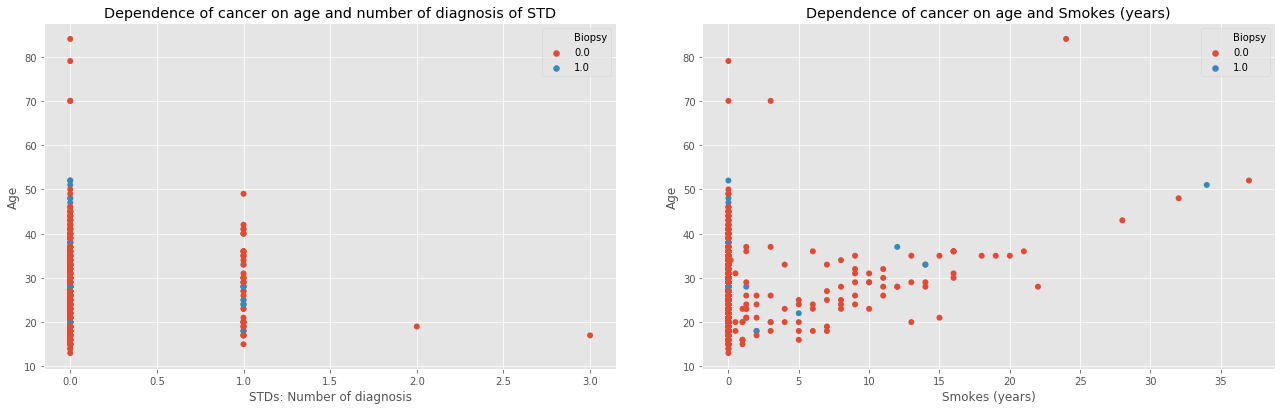

In [19]:
plt.subplot(221)
#f, ax = plt.subplots(figsize=(7, 6.5))
# sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="STDs: Number of diagnosis", y="Age",
                hue="Biopsy",
                sizes=(1, 8), linewidth=0,
                data=data)
plt.title('Dependence of cancer on age and number of diagnosis of STD')

plt.subplot(222)
#f, ax = plt.subplots(figsize=(7, 6.5))
# sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="Smokes (years)", y="Age",
                hue="Biopsy",
                sizes=(1, 8), linewidth=0,
                data=data)
plt.title('Dependence of cancer on age and Smokes (years)')


plt.subplots_adjust(top=2.92, bottom=0.10, left=0.10, right=2.95, hspace=0.35,
                    wspace=0.15)

Some additional hypotheses:

- quantity of STDs diagnosis don't affect on cancer. People with one diagnosis or more don't have a predisposition to a disease 

- there are also no correlation with quantity of years of smoking

# Metrics & Validation

Please, analyze the balance of the target variable (or variables if you decided to work with two output variables). Which quality metrics are suitable for your task? Why? (2 points).

In [20]:
#above i consider the problem about balance in my target


from sklearn.metrics import recall_score

#in the question of which metric i can use in this task, i choose the 'recall'

#from description: "the recall is the ratio tp / (tp + fn) 
#where tp is the number of true positives and fn the number of false negatives. 
#The recall is intuitively the ability of the classifier to find all the positive samples."

#because we dont want to diagnosis cancer for patient if he doesnt really have cancer. 
#So the higher the recall is the less chance will be that our model will wrong classify someone has cancer. 

Split data into train and test sets using train_test_split. Important: if your problem is imbalanced, use stratify parameter.  The test set shouldn't be used for models fitting or selection of the optimal set of parameters (1 point).

In [21]:
target = data['Biopsy']
features = data[['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx']]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                   shuffle = True)

In [23]:
X_train.shape, X_test.shape

((534, 28), (134, 28))

In [24]:
'''
so, to understand about imbalance in dataset, 
i choosed to count how many patients and healthy people in dataset
'''
from collections import Counter

Counter(data['Biopsy'])

Counter({0.0: 623, 1.0: 45})

In [25]:
from sklearn.utils import resample

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
healthy = X[X.Biopsy==0]
patients = X[X.Biopsy==1]

# upsample minority
patients_upsampled = resample(patients,
                          replace=True, # sample with replacement
                          n_samples=len(healthy), # match number in majority class
                          random_state=42) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([healthy, patients_upsampled])

In [26]:
# check new class counts
upsampled.Biopsy.value_counts()

1.0    500
0.0    500
Name: Biopsy, dtype: int64

In [29]:
from sklearn.utils import shuffle
upsampled = shuffle(upsampled)

In [30]:
upsampled

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Biopsy
786,25.0,6.0,17.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
786,25.0,6.0,17.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
169,18.0,3.0,18.0,4.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
563,36.0,1.0,28.0,1.0,1.0,16.0,2.4,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
598,17.0,2.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,29.0,2.0,18.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
670,47.0,2.0,17.0,3.0,0.0,0.0,0.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
598,17.0,2.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
54,36.0,1.0,16.0,3.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
y_train = upsampled.Biopsy
X_train = upsampled.drop('Biopsy', axis=1)

In [32]:
X_train.shape, y_train.shape

((1000, 28), (1000,))

# ML models

Propose appropriate preprocessing steps for your model, for example,
- use SimpleImputer() if you have missing variables;
- use OneHotEncoder() if you have categorical variables;
- use StandardScaler() if you plan to work with a linear method.

Implement a pipeline to combine the designed preprocessing steps with LogisticRegression (2 points).

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [34]:
scaler = StandardScaler()
# X_train_scaler = scaler.fit_transform(X_train)
# X_test_scaler = scaler.transform(X_test)

In [35]:
from sklearn.pipeline import Pipeline

In [36]:
pipe = []
pipe.append(('scaler', scaler))
pipe.append(('lr', LogisticRegression()))
model = Pipeline(pipe)

In [37]:
model.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [38]:
recall_score(y_test, model.predict(X_test), average='macro')   

0.6378418329637842

Find a good combination of parameters(penalty type and regularization coefficient C) via cross-validation. Please use the stratified version of KFold if your dataset isn't balanced, see StratifiedKFold() (4 points).

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [40]:
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.711


Refit model with optimal parameters on the whole train set and check the quality of prediction on the test set (1 point).

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

In [42]:
models = {
    'lr':  Pipeline([('scaler',StandardScaler()), ('lr', LogisticRegression(solver='saga', l1_ratio=1))]),
    'rf': Pipeline([('scaler',StandardScaler()), ('rf', RandomForestClassifier())]),
    'gb': Pipeline([('scaler',StandardScaler()), ('gb', GradientBoostingClassifier())]),
    'xgb': Pipeline([('scaler',StandardScaler()), ('xgb', XGBClassifier())])#,
#     'knn': Pipeline([('scaler',StandardScaler()), ('knn', KNeighborsRegressor())]),
    #'LSVC': Pipeline([('scaler',StandardScaler()), ('lsvc', LinearSVC())]), 
    #'GNB': Pipeline([('scaler',StandardScaler()), ('gnb', GaussianNB())])    
}

In [43]:
parameters = {
    'lr': {'lr__penalty': ['l1', 'l2', 'elasticnet'],
        'lr__C':  [0.001, 0.01, 0.1, 1.0, 10.0, 100.]},
    
    'rf': {#'rf__n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)],
          'rf__max_depth': [1,2,3,4,5,6,7,8,9,10],
          'rf__min_samples_split': np.arange(2,10)},
    
    'gb': {'gb__learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],
          'gb__n_estimators': [1, 2, 4, 8, 16, 32, 64, 100],
          'gb__max_depth': [1,2,3,4,5,6,7,8,9,10],
          'gb__min_samples_split' : np.linspace(0.1, 1.0, 10, endpoint=True)},
    
    'xgb': {'xgb__max_depth':[1,2,3,4,5,6,7,8,9,10],
             'xgb__min_child_weight':range(1,6,2)}#,
    
#     'knn': {'knn__n_neighbors': np.arange(5,30)}
    
    #'LSVC': {},
    
    #'GNB': {}
}
    
    

In [44]:
models['gb'].get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'gb', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'gb__criterion', 'gb__init', 'gb__learning_rate', 'gb__loss', 'gb__max_depth', 'gb__max_features', 'gb__max_leaf_nodes', 'gb__min_impurity_decrease', 'gb__min_impurity_split', 'gb__min_samples_leaf', 'gb__min_samples_split', 'gb__min_weight_fraction_leaf', 'gb__n_estimators', 'gb__n_iter_no_change', 'gb__presort', 'gb__random_state', 'gb__subsample', 'gb__tol', 'gb__validation_fraction', 'gb__verbose', 'gb__warm_start'])

In [47]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Repeat the last step with any tree-based model (Random Forest, GradientBoosting, XGBoost or CatBoost). Use GridSearchCV to identify the optimal set of parameters (at least, try to different reasonable values of  n_estimators and max_depth). Check the quality on the test set  (4 points).

model: lr
____________________________________
Accuracy: 0.71 (+/- 0.05)
____________________________________
____________________________________
TRAIN recall: 0.624
TEST recall: 0.45454545454545453
____________________________________
TRAIN accuracy_score: 0.732
TEST accuracy_score: 0.8208955223880597
____________________________________
TRAIN f1_score: 0.6995515695067265
TEST f1_score: 0.29411764705882354
____________________________________
TRAIN precision_score: 0.7959183673469388
TEST precision_score: 0.21739130434782608


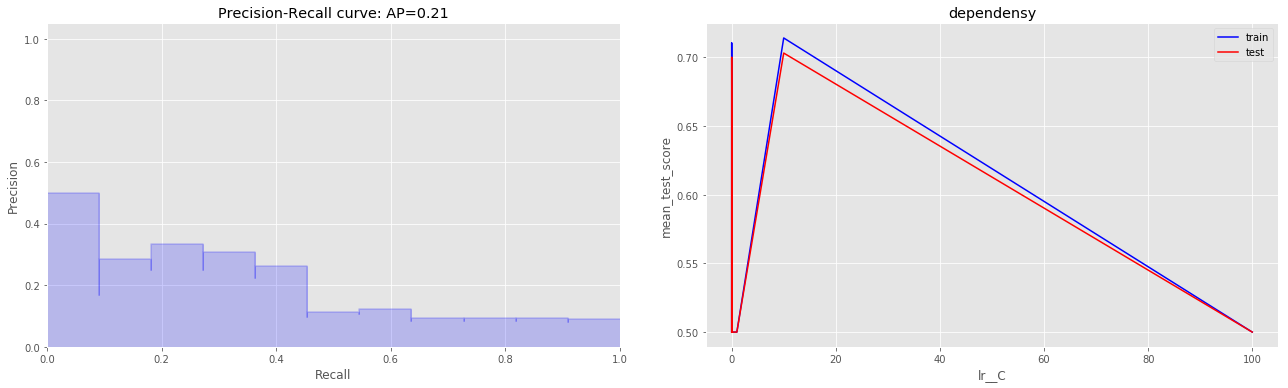

____________________________________
____________________________________
____________________________________
model: rf
____________________________________
Accuracy: 0.93 (+/- 0.05)
____________________________________
____________________________________
TRAIN recall: 0.946
TEST recall: 0.2727272727272727
____________________________________
TRAIN accuracy_score: 0.97
TEST accuracy_score: 0.9029850746268657
____________________________________
TRAIN f1_score: 0.9692622950819673
TEST f1_score: 0.3157894736842105
____________________________________
TRAIN precision_score: 0.9936974789915967
TEST precision_score: 0.375


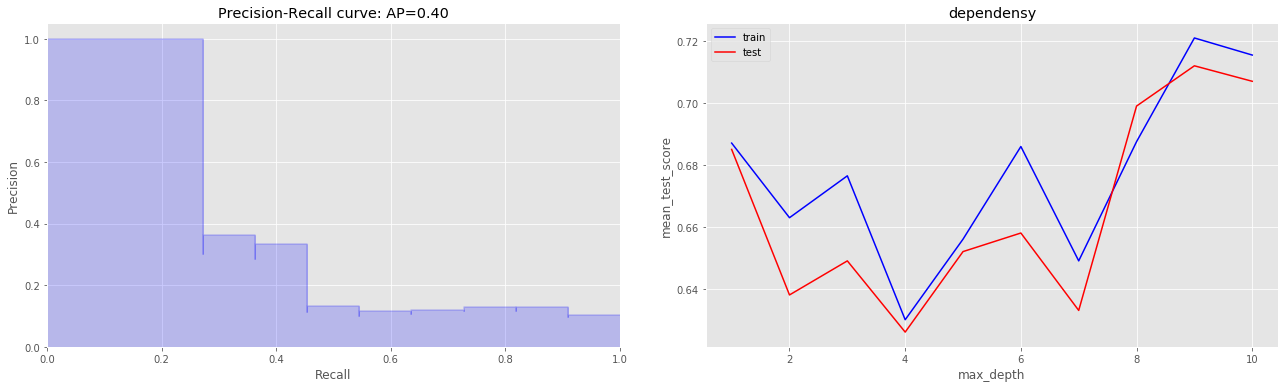

____________________________________
____________________________________
____________________________________
model: gb


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,precision_score
from sklearn.metrics import precision_recall_curve
from inspect import signature
from sklearn.metrics import average_precision_score

# make imports
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

for model in models.keys():
    print('model:', model)
    simplefilter(action='ignore')
    clf = GridSearchCV(models[model], parameters[model],cv=3, return_train_score=True)
    clf.fit(X_train, y_train)
    
    kfold = KFold(n_splits=10)
    scores = cross_val_score(clf, X_train, y_train, cv=kfold)
    print('____________________________________')  
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print('____________________________________')
    
    #y_pred_train = cross_val_predict(clf, X_train, y, cv=3)
    
#     kfold = KFold(n_splits=10, random_state=seed)
#     results = cross_val_score(model, X_train, y_train, cv=kfold)
    
    #clf = clf.best_model_
    
    print('____________________________________')  
    #print('____________________________________')
    try:
        print('TRAIN recall:', recall_score(y_train, clf.predict(X_train))  )
        print('TEST recall:', recall_score(y_test, clf.predict(X_test))  )
    except ValueError:
        continue
    print('____________________________________')
    try:
        print('TRAIN accuracy_score:', accuracy_score(y_train, clf.predict(X_train))  )
        print('TEST accuracy_score:', accuracy_score(y_test, clf.predict(X_test))  )
    except ValueError:
        continue
    print('____________________________________')
    try:
        print('TRAIN f1_score:',f1_score(y_train, clf.predict(X_train))  )
        print('TEST f1_score:', f1_score(y_test, clf.predict(X_test))  )
    except ValueError:
        continue
    print('____________________________________')
    try:
        print('TRAIN precision_score:',precision_score(y_train, clf.predict(X_train))  )
        print('TEST precision_score:', precision_score(y_test, clf.predict(X_test))  )
    except ValueError:
        continue
        
        
    y_score = clf.predict_proba(X_test)[:,1]#clf.decision_function(X_test)  
    average_precision = average_precision_score(y_test, y_score)
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
                   else {})
        
    if model == 'rf': 
        plt.subplot(221)
        plt.step(recall, precision, color='b', alpha=0.2,
                 where='post')
        plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.title('Precision-Recall curve: AP={0:0.2f}'.format(
                  average_precision))
        
        plt.subplot(222)
        plt.plot(parameters[model]['rf__max_depth'], clf.cv_results_['mean_train_score'][:len(parameters[model]['rf__max_depth'])], c = 'b', label = 'train')
        plt.plot(parameters[model]['rf__max_depth'], clf.cv_results_['mean_test_score' ][:len(parameters[model]['rf__max_depth'])], c = 'r', label = 'test')
        plt.xlabel('max_depth')
        plt.ylabel('mean_test_score')
        plt.title('dependensy')
        plt.legend()
        
        plt.subplots_adjust(top=2.92, bottom=0.28, left=0.10, right=2.95, hspace=0.35,
                    wspace=0.15)
        
        plt.show()
        
        
    if model == 'xgb':
        plt.subplot(221)
        plt.step(recall, precision, color='b', alpha=0.2,
                 where='post')
        plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.title('Precision-Recall curve: AP={0:0.2f}'.format(
                  average_precision))
        
        plt.subplot(222)
        plt.plot(parameters[model]['xgb__max_depth'], clf.cv_results_['mean_train_score' ][:len(parameters[model]['xgb__max_depth'])], c = 'b', label = 'train')
        plt.plot(parameters[model]['xgb__max_depth'], clf.cv_results_['mean_test_score' ][:len(parameters[model]['xgb__max_depth'])], c = 'r', label = 'test')
        plt.xlabel('max_depth')
        plt.ylabel('mean_test_score')
        plt.title('dependensy')
        plt.legend()
        
        plt.subplots_adjust(top=2.92, bottom=0.28, left=0.10, right=2.95, hspace=0.35,
                    wspace=0.15)
        
        plt.show()
        
    if model == 'knn':
        plt.subplot(221)
        plt.step(recall, precision, color='b', alpha=0.2,
                 where='post')
        plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.title('Precision-Recall curve: AP={0:0.2f}'.format(
                  average_precision))
        
        plt.subplot(222)
        plt.plot(parameters[model]['knn__n_neighbors'], clf.cv_results_['mean_train_score' ][:len(parameters[model]['knn__n_neighbors'])], c = 'b', label = 'train')
        plt.plot(parameters[model]['knn__n_neighbors'], clf.cv_results_['mean_test_score' ][:len(parameters[model]['knn__n_neighbors'])], c = 'r', label = 'test')
        plt.xlabel('knn__n_neighbors')
        plt.ylabel('mean_test_score')
        plt.title('dependensy')
        plt.legend()
        
        plt.subplots_adjust(top=2.92, bottom=0.28, left=0.10, right=2.95, hspace=0.35,
                    wspace=0.15)
        
        plt.show()
        
    if model == 'lr':
        plt.subplot(221)
        plt.step(recall, precision, color='b', alpha=0.2,
                 where='post')
        plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.title('Precision-Recall curve: AP={0:0.2f}'.format(
                  average_precision))
        
        plt.subplot(222)
        
        plt.plot(parameters[model]['lr__C'], clf.cv_results_['mean_train_score' ][:len(parameters[model]['lr__C'])], c = 'b', label = 'train')
        plt.plot(parameters[model]['lr__C'], clf.cv_results_['mean_test_score' ][:len(parameters[model]['lr__C'])], c = 'r', label = 'test')
        plt.xlabel('lr__C')
        plt.ylabel('mean_test_score')
        plt.title('dependensy')
        plt.legend()
        
        plt.subplots_adjust(top=2.92, bottom=0.28, left=0.10, right=2.95, hspace=0.35,
                    wspace=0.15)
        
        plt.show()
        
        
        
    if model == 'gb':
        plt.subplot(221)
        plt.step(recall, precision, color='b', alpha=0.2,
                 where='post')
        plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.title('Precision-Recall curve: AP={0:0.2f}'.format(
                  average_precision))
        
        plt.subplot(222)
        
        plt.plot(parameters[model]['gb__max_depth'], clf.cv_results_['mean_train_score' ][:len(parameters[model]['gb__max_depth'])], c = 'b', label = 'train')
        plt.plot(parameters[model]['gb__max_depth'], clf.cv_results_['mean_test_score' ][:len(parameters[model]['gb__max_depth'])], c = 'r', label = 'test')
        plt.xlabel('gb__max_depth')
        plt.ylabel('mean_test_score')
        plt.title('dependensy')
        plt.legend()
        
        plt.subplots_adjust(top=2.92, bottom=0.28, left=0.10, right=2.95, hspace=0.35,
                    wspace=0.15)
        
        plt.show()
        
    print('____________________________________')
    print('____________________________________')
    print('____________________________________')

# Conclusion

Write a summary of your work (2 points).